In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

# K-Means 클러스터링

#### 분할적 군집(Partitional Clustering)
- cluster 개수가 필요함 <br>
<br>
- cluster: 독립 변수의 특성이 유사한 데이터의 그룹 <br>
- clustering: 주어진 데이터를 여러 개의 클러스터로 구분. <br>
K개의 클러스터 중 모든 데이터에 대해 1~K번 클러스터 중에서 몇번 클러스터에 속하는지 예측하는 작업

## K-Means 클러스터링 알고리즘
- 가장 단순하고 빠름
- 목적함수의 값이 최소화될 때 까지 클러스터의 중심(centroid)와 각 데이터가 소속될 클러스터를 반복해서 찾음. <br>
        임의의 중심값(주로 데이터 샘플 중 하나를 고름)을 고르고, 
        중심에서 각 샘플 데이터 간 거리를 계산한 후 
        각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터를 갱신
        다시 만들어진 클러스터에 대해 중심을 다시 계산하고 위 과정을 반복함

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
# make_classification : 분류(classification)를 위한 가상 데이터셋을 만드는 함수

In [3]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, random_state=123)

X: 20행 2열짜리 데이터(n_samples(표본 데이터 수), n_features(독립변수 수)) <br>
y: 0과 1을 갖는 데이터(n_classes(종속변수의 클래스 수)) <br><br>
n_informative: 독립변수 중 종속변수와 상관관계가 있는 성분의 수 <br>
    (독립변수 중 다른 독립변수와 선형조합으로 나타나는 성분의 수) <br>
n_reduntant: 독립변수 중 다른 독립변수와 관련이 있는 성분의 수(0이므로 연관없음) <br>
n_clusters_per_class: 클래스 당 클러스터의 수

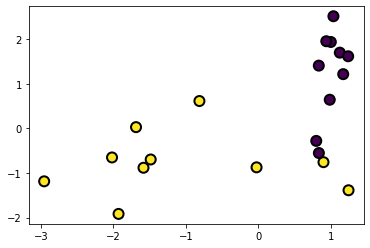

In [4]:
# X 데이터를 이용한 산점도 그래프
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [5]:
# KMeans 클래스를 이용해 클러스터의 수가 2개인 클러스터링 모형 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random")
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [6]:
# 두 클러스터의 중심점
model.cluster_centers_

array([[-1.56258716, -0.69768199],
       [ 1.01138251,  0.83200493]])

In [7]:
# 클러스터링을 통해 예측한 레이블
pred = model.predict(X)
pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [8]:
import pandas as pd
import numpy as np

In [9]:
# 모형을 이용해 클러스터링 된 결과
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], X[model.labels_ == 0, 1],
                s=20, marker='v', c='r')
    plt.scatter(data[model.labels_ == 1, 0], X[model.labels_ == 1, 1],
                s=20, marker='v', c='b')
    plt.scatter(c0[0], c0[1], s=40, c='r', edgecolor='k', linewidth=2)
    plt.scatter(c1[0], c1[1], s=40, c='b', edgecolor='k', linewidth=2)

In [10]:
c0, c1 = model.cluster_centers_
df = pd.DataFrame(data=np.c_[X, 
                             np.linalg.norm(X-c0, axis=1),
                             np.linalg.norm(X-c1, axis=1),
                             model.labels_],
                  columns=['X0', 'X1', 'd0', 'd1', 'class'])

In [11]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,4.131178,1.679969,1.0
1,1.002714,1.935215,3.675992,1.103245,1.0
2,-1.688105,0.025994,0.734481,2.817248,0.0
3,0.901344,-0.758966,2.464693,1.594771,1.0
4,0.836531,1.404882,3.190070,0.598967,1.0


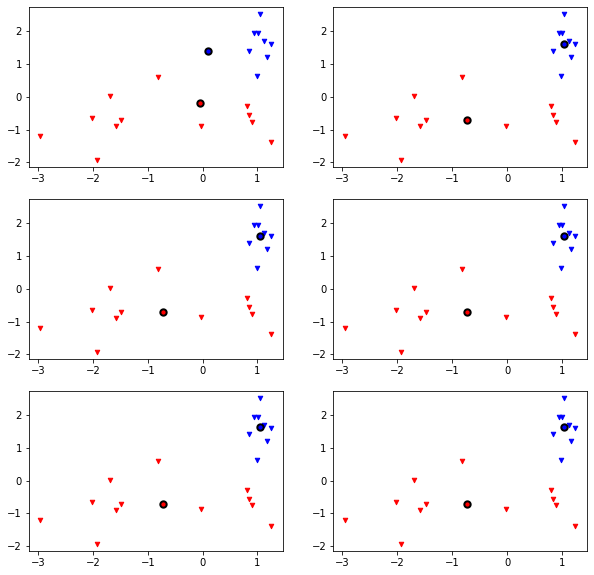

In [12]:
plt.figure(figsize=(10,10))
for i in range(6):
    model = KMeans(n_clusters=2, init="random",
                   n_init=1, max_iter=(i+1),
                  random_state=1)
    model.fit(X)
    plt.subplot(3, 2, (i+1))
    plot_cluster(model, X)

### iris 데이터 군집분석

In [13]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.species # iris.iloc[:, -1]

In [14]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [15]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

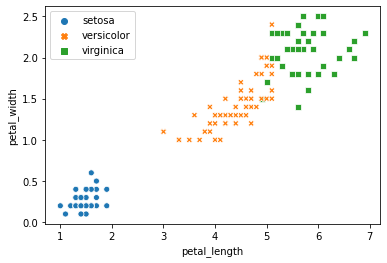

In [18]:
ax = sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str,
                     style=pred_str, data=iris)
# 군집분석한 결과

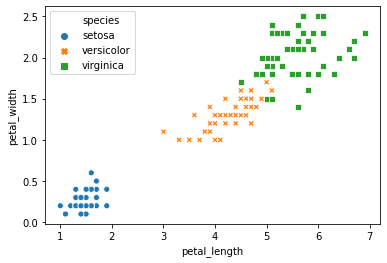

In [19]:
ax = sns.scatterplot(x="petal_length", y="petal_width", hue="species",
                     style="species", data=iris)
# 원본 데이터

# Hierarchical 클러스터링

#### 계층적 군집(Hierarchical Clustering)
- 군끼리 묶으면서 <b>최종적으로 하나의 군집이 될 때 까지</b> 군을 묶는 클러스터링 알고리즘 <br>
- 군집간의 거리를 기반으로 클러스터링하며, 군집의 수를 미리 정해주지 않아도 됨. <br>
- 시각화 : Dendrogram

-  적정한 y값에서 멈추면 n개의 군까지 클러스터링 할 수 있음
- y=4에서 클러스터링이 멈추면 총 3개의 클러스터로 군집이 됨

In [20]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [22]:
# linkage() 함수를 이용하여 계측적 군집을 실시
# method="complete": 두 클러스터상에서 가장 먼 거리를 이용해 측정하는 방식
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method="complete")

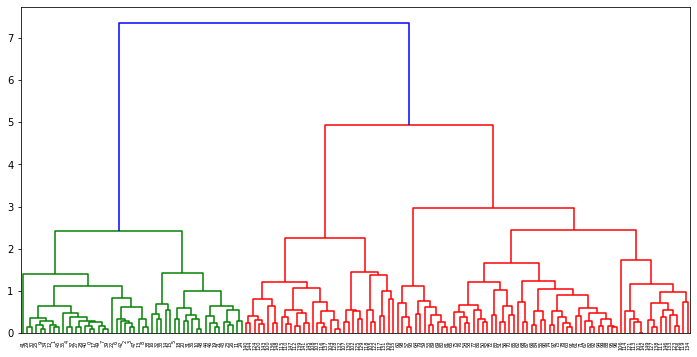

In [23]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

- 계층적 군집의 기본 원리는 두 클러스터 사이의 거리를 측정해서 거리가 가까운 클러스터끼리 묶는 방법.
- 두 클러스터의 거리를 측정할 때의 기준점 위치를 결정해야 함 <br><br>
이때 사용하는 것이 method속성
### method
- "complete": 두 클러스터 상에서 가장 먼 거리를 이용해 측정
- "single": 두 클러스터에서 가장 가까운 거리를 사용
- "average" 각 클러스터내의 각 점에서 다른 클러스터내의 모든 점 사이의 거리에 대한 평균을 이용

In [24]:
from scipy.cluster.hierarchy import fcluster
a = fcluster(cluster_model, 4, criterion="distance")

In [25]:
# y값이 낮을수록 클러스터의 수가 많아짐
b = fcluster(cluster_model, 2.5, criterion="distance")
print(len(set(a)), len(set(b)))

3 4


In [26]:
predict = fcluster(cluster_model, 4, criterion="distance")
adjusted_pred = np.choose(predict-1, [0, 2, 1]) # array 값 일괄변경
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [27]:
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)
ct = pd.crosstab(origin_name, pred_name,
                 rownames=["True"], colnames=["Predicted"], margins=True)
ct # 교차분류표

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


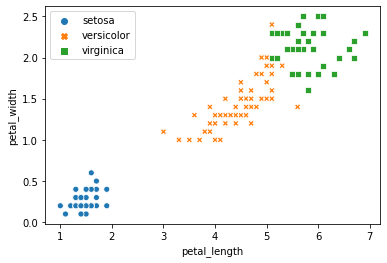

In [28]:
ax = sns.scatterplot(x="petal_length", y="petal_width", data=iris,
                     hue=pred_name, style=pred_name)

# 클러스터링 알고리즘의 한계

- 크기 (Sizes)
- 밀도 (Densities)
- 비 구형(Non-golbular shapes)

In [29]:
def make_group(mean, std_var, n, data):
    np.random.seed(0)
    group = np.random.normal(mean, std_var, (data, 2))
    clss = np.full(group.shape[0], n)
    return np.c_[group, clss]   

## 크기

In [30]:
group0 = make_group(-10, 2, 0, 10)
group1 = make_group(10, 2, 1, 10)
group2 = make_group(0, 5, 2, 100)

In [31]:
data = np.r_[group0, group1, group2]

In [32]:
def draw_origin(data):
    plt.scatter(x=data[:, 0], y=data[:, 1],
                marker='o', c=data[:, 2].astype(np.int), s=100,
                edgecolor="k", linewidth=2)
    plt.show()
# original data

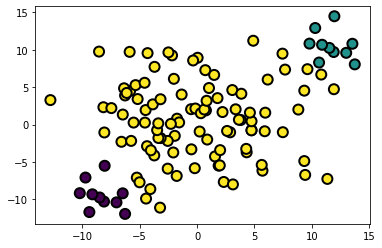

In [33]:
draw_origin(data)

In [34]:
# K-Means Clustering을 통해 3개의 군으로 나눔
from sklearn.cluster import KMeans

In [35]:
def kM(data, n):  
    model = KMeans(n_clusters=n, init="random")
    model.fit(data[:, 0:2])
    return model

In [36]:
model.cluster_centers_

array([[-0.72607008, -0.71382205],
       [ 1.04359173,  1.62105848]])

In [37]:
model = kM(data, 3)
pred = model.predict(data[:, 0:2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 2])

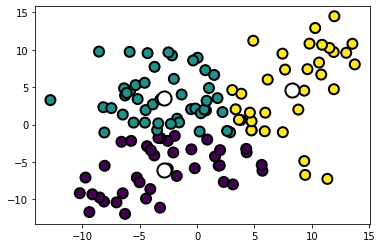

In [38]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred,
            s=100, edgecolor="k", linewidth=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

In [39]:
def visualize(model, data, n):
    c = model.cluster_centers_
    colors = ['r', 'g', 'b']
    for i in range(n):
        plt.scatter(x=data[model.labels_ == i, 0], y=data[model.labels_ == i, 1],
                    s=50, marker='v', c=colors[i])
    
    for i in range(n):
        plt.scatter(c[i][0], c[i][1], s=200, c=colors[i], edgecolor='k', linewidth=2)
    plt.show()

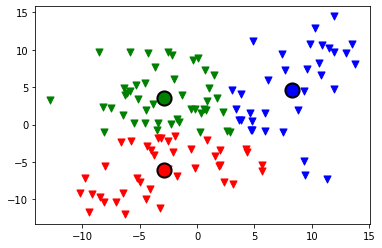

In [40]:
visualize(model,data, 3)

문제를 해결하기 위해, 클러스터의 수를 조정: 3->5

In [41]:
model = kM(data, 5)

In [42]:
def visualize2(model, data):
    centers = model.cluster_centers_
    colors = ['r','g','b','c','m','y','k']
    markers = ['o','s','v','^','.','*','<']
    for i, c in enumerate(centers):
        plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
                    s=50, marker=markers[i], c=colors[i])
        plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k', linewidth=2)
    plt.show()

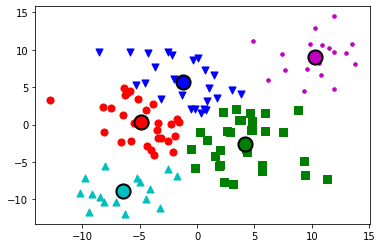

In [43]:
visualize2(model, data)

## 밀도가 다를 경우

In [44]:
group0 = make_group(13, 0.5, 0, 50)
group1 = make_group(10, 1.5, 1, 50)
group2 = make_group(0, 5, 2, 50)
data = np.r_[group0, group1, group2]

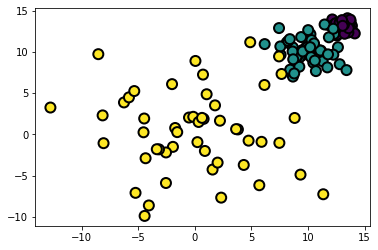

In [45]:
draw_origin(data)

In [46]:
model = kM(data, 3)
pred = model.predict(data[:, 0:2])

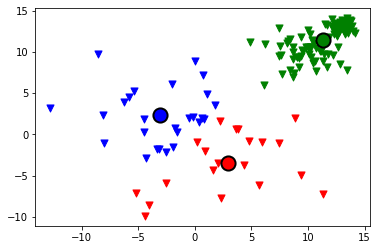

In [47]:
visualize(model, data, 3)

클러스터의 갯수 조정: 3->5

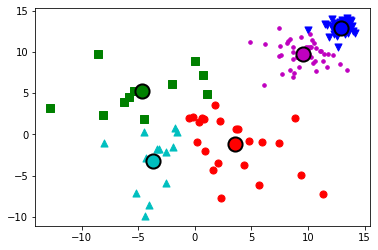

In [48]:
model = kM(data, 5)
visualize2(model, data)

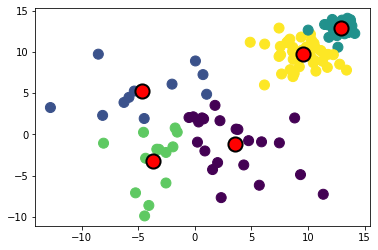

In [49]:
pred = model.predict(data[:, 0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

## 비 구형인 경우

In [50]:
# sin() 함수와 cos() 함수를 이용한 구형이 아닌 분포를 갖는 임의 데이터
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

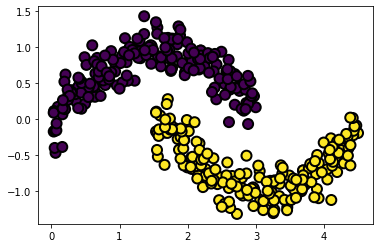

In [51]:
draw_origin(data)

In [52]:
model = kM(data, 2)

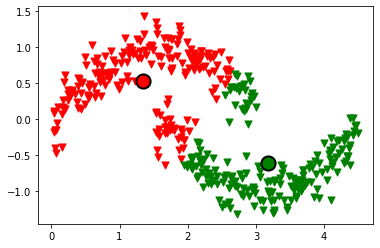

In [53]:
visualize(model, data, 2)

클러스터의 갯수 조정: 3->7

In [54]:
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:, 0:2])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=2,
       tol=0.0001, verbose=0)

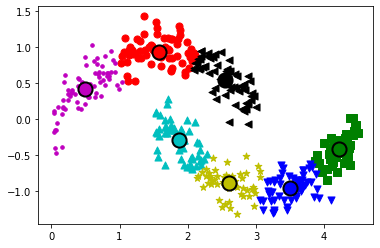

In [55]:
visualize2(model, data)

위 예제에서, cluster의 갯수가 7개인 것은 큰 의미가 없음. 굳이 의미를 둔다면 cluster의 갯수가 2개부터 10개인 경우의 실루엣 계수를 계산했을 때, <br>
그중 cluster가 2개가 아닌 경우 가장 큰 실루엣계수를 출력하는 cluster의 갯수를 선택한 것<br>

In [56]:
# 실루엣 계수 출력
from sklearn.metrics import silhouette_score
range_n_clusters = [i for i in range(2, 11)]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:, :-1], cluster_labels)
    print("클러스터 수: {}, 실루엣 계수: {}".format(n_clusters, score))

클러스터 수: 2, 실루엣 계수: 0.5019771063006361
클러스터 수: 3, 실루엣 계수: 0.4624555105457338
클러스터 수: 4, 실루엣 계수: 0.504369750617699
클러스터 수: 5, 실루엣 계수: 0.48961613133936793
클러스터 수: 6, 실루엣 계수: 0.49361739033370483
클러스터 수: 7, 실루엣 계수: 0.49080854961331327
클러스터 수: 8, 실루엣 계수: 0.485759200582031
클러스터 수: 9, 실루엣 계수: 0.4733182173431985
클러스터 수: 10, 실루엣 계수: 0.4692625694936315


# 클러스터링 성능평가 기준

## 클러스터의 개수 및 소속을 알고 있는 경우

KMeans 클러스터링의 score() 함수는 inertia 속성의 값을 음수로 출력하기 때문에, <br>
클러스터링의 모형 평가 수치를 확인하려면 다른 방법을 사용해야 함

For n_clusters =  2 The average silhouette_score is :  0.7653904101258123


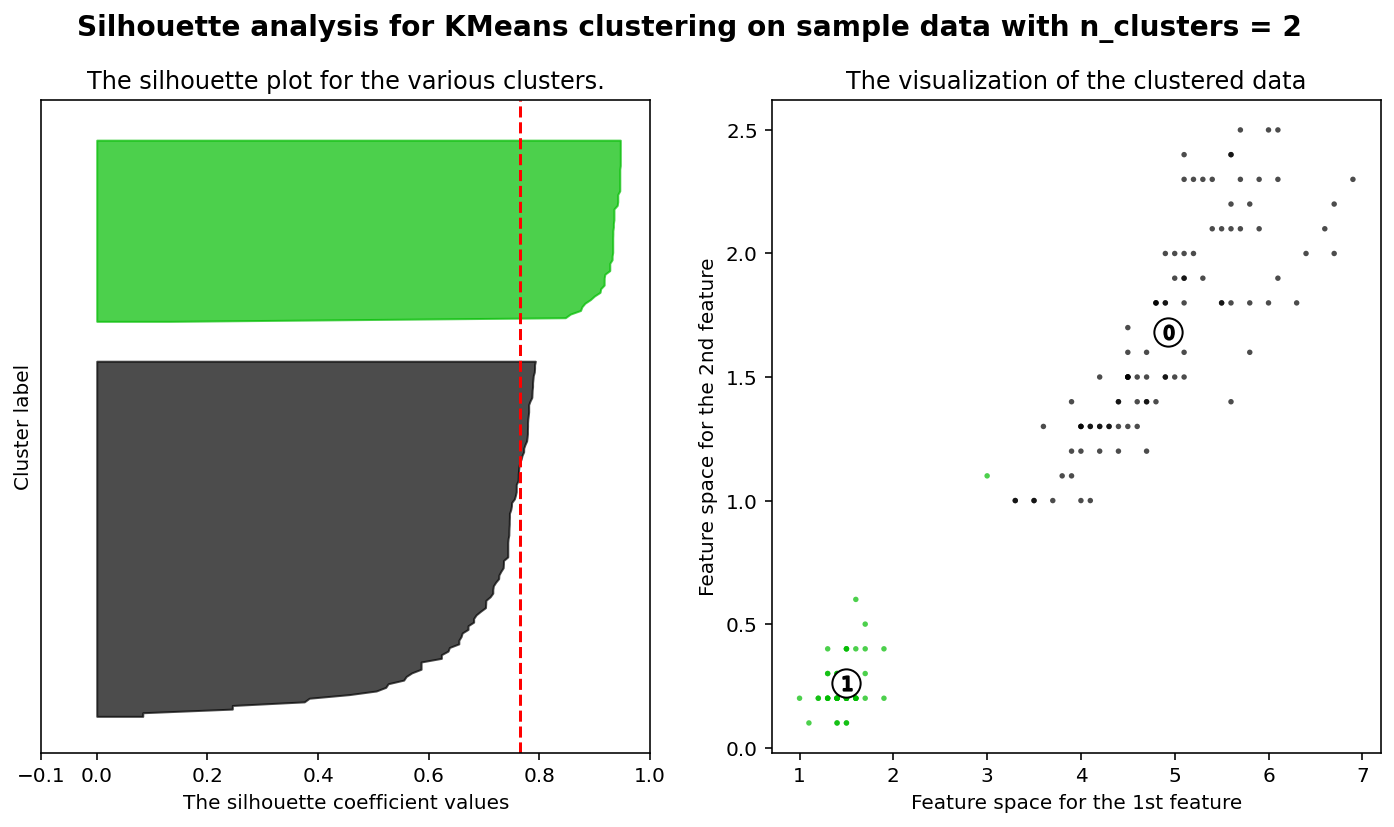

For n_clusters =  3 The average silhouette_score is :  0.6604800083974887


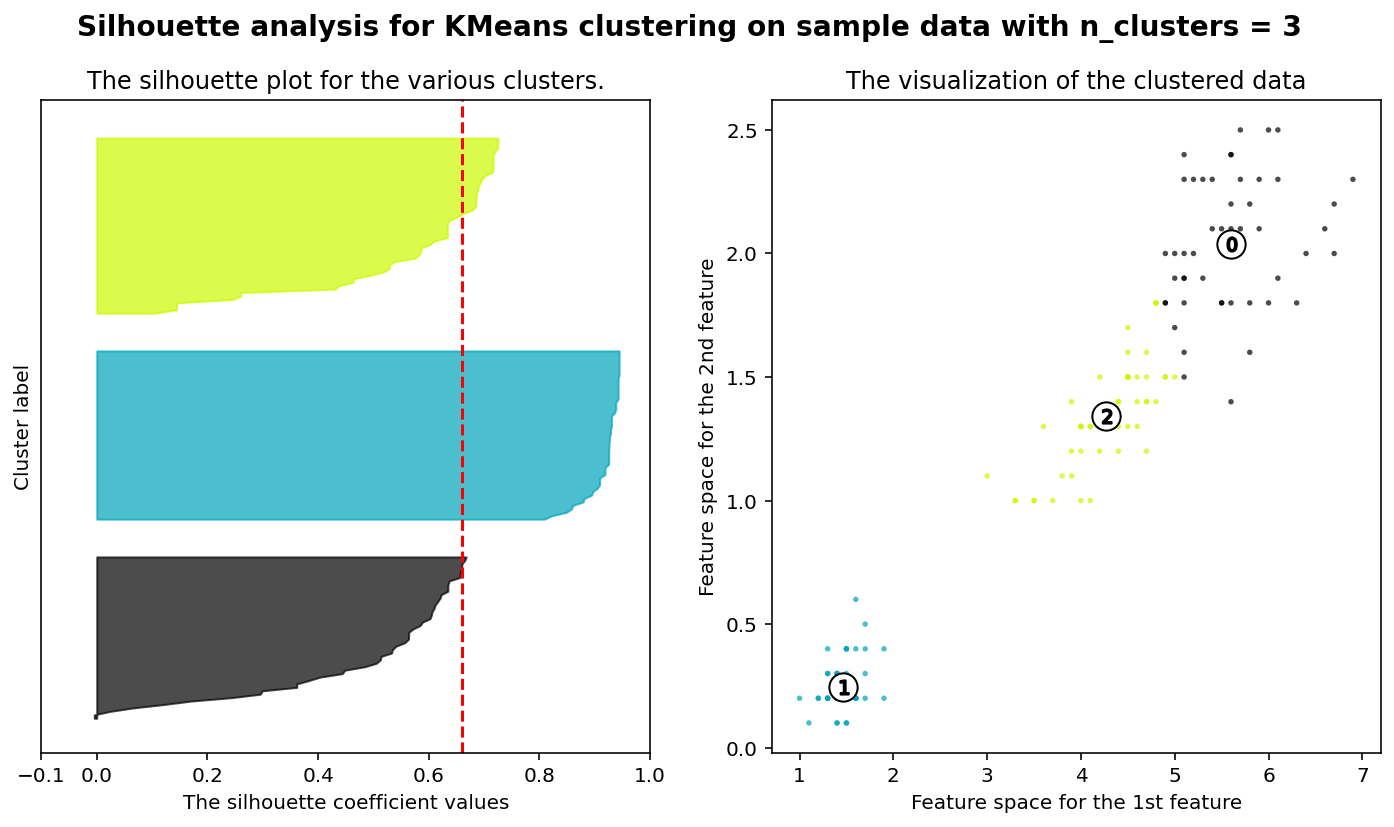

For n_clusters =  4 The average silhouette_score is :  0.6127580794464402


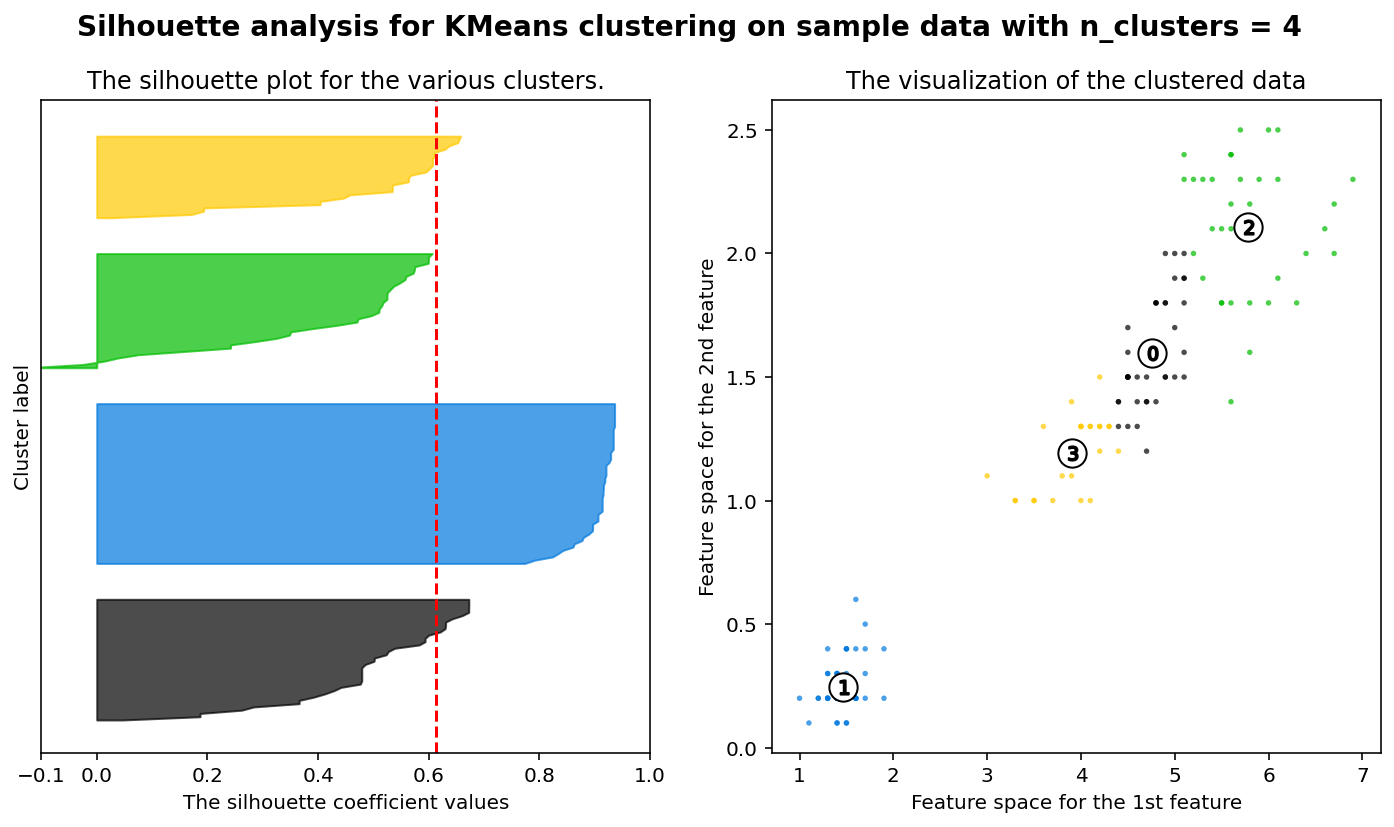

For n_clusters =  5 The average silhouette_score is :  0.5883732712110276


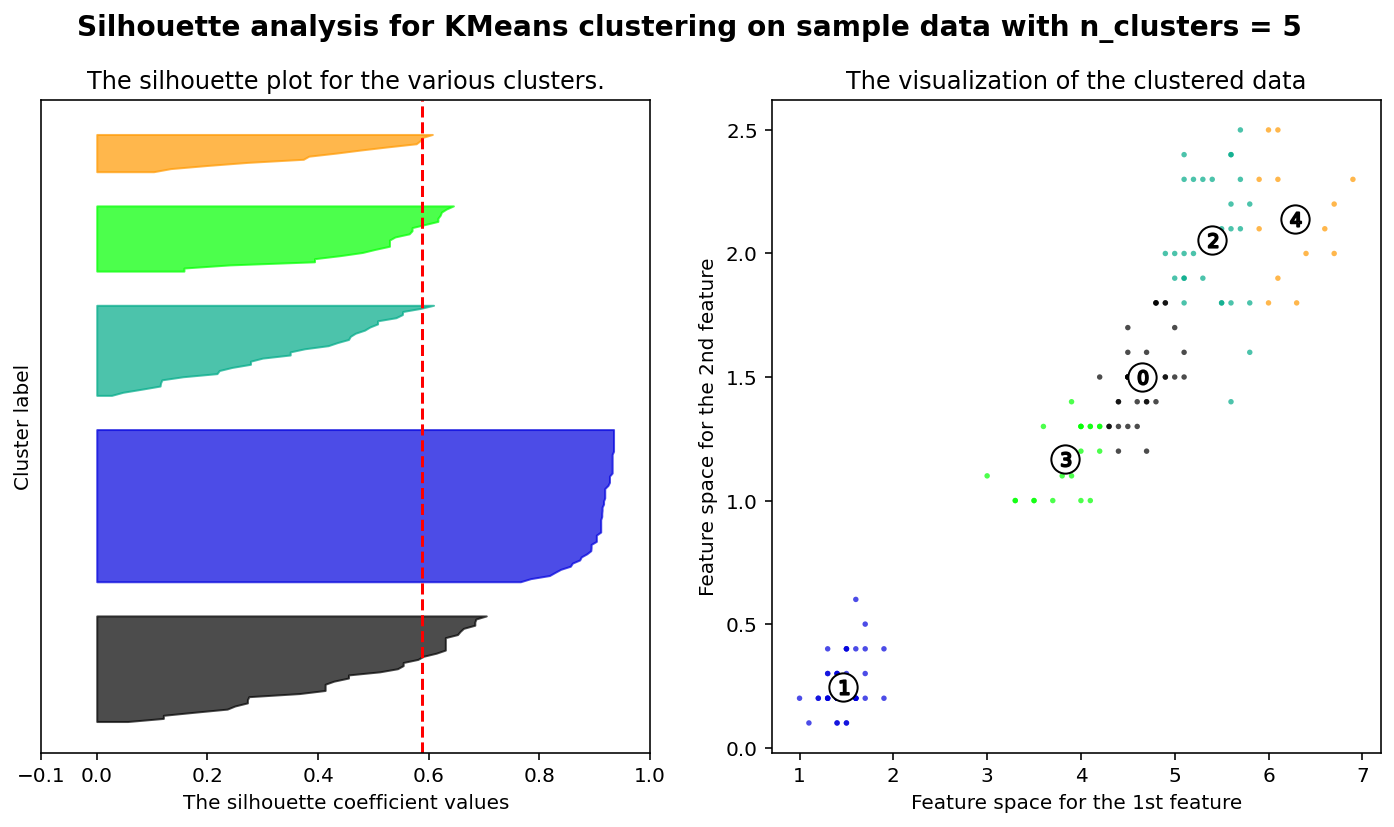

For n_clusters =  6 The average silhouette_score is :  0.5753448148375986


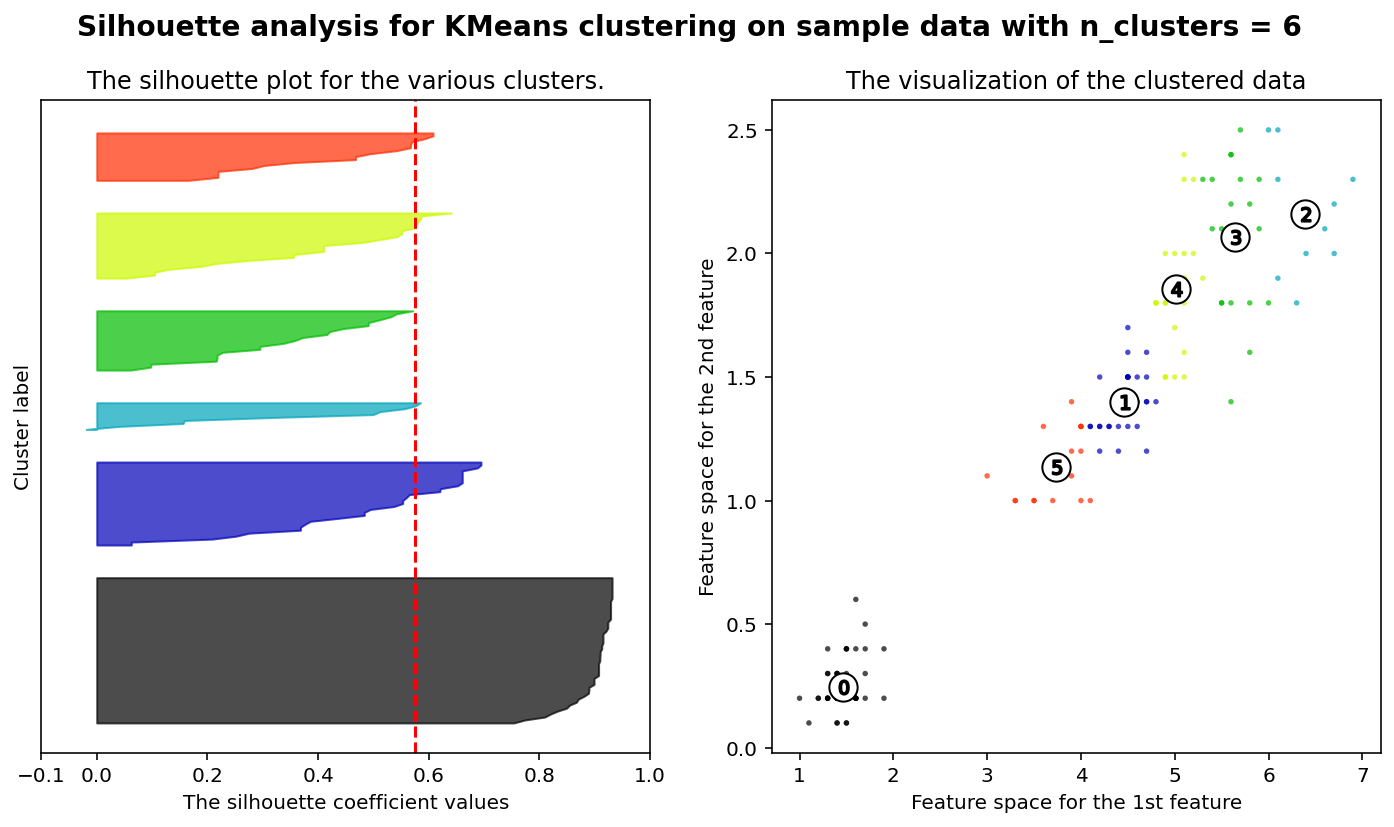

For n_clusters =  7 The average silhouette_score is :  0.5775551967951814


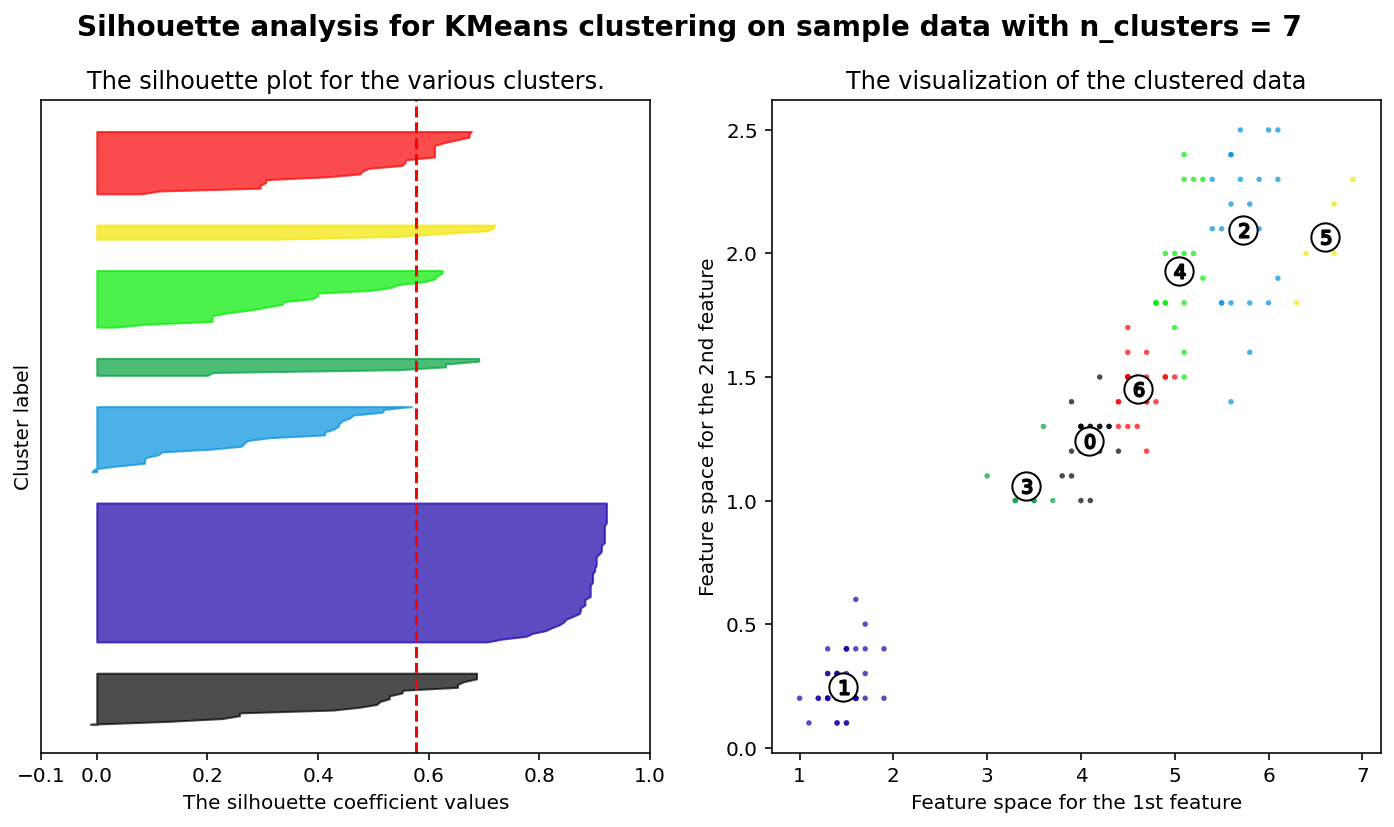

For n_clusters =  8 The average silhouette_score is :  0.591498049612282


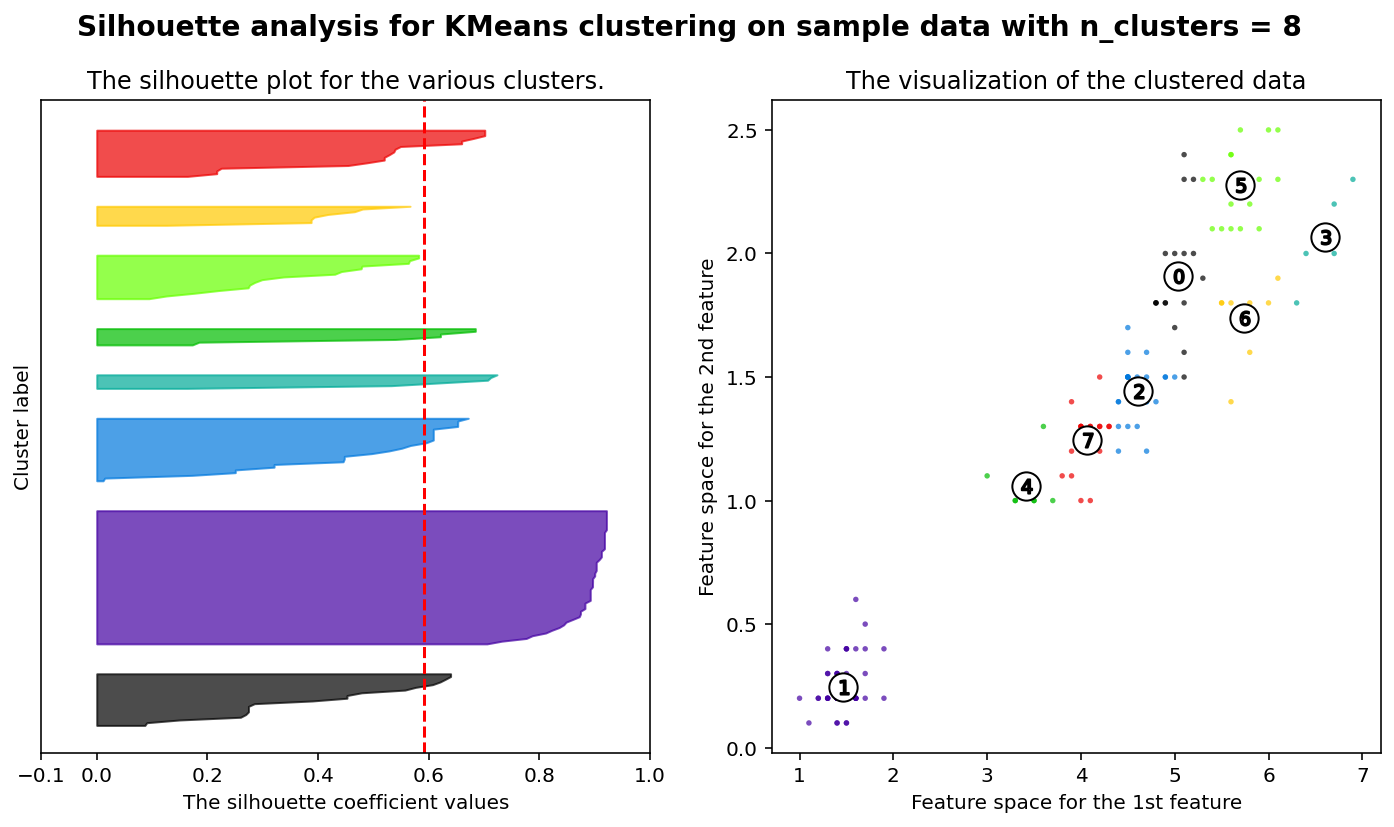

For n_clusters =  9 The average silhouette_score is :  0.5748859182736032


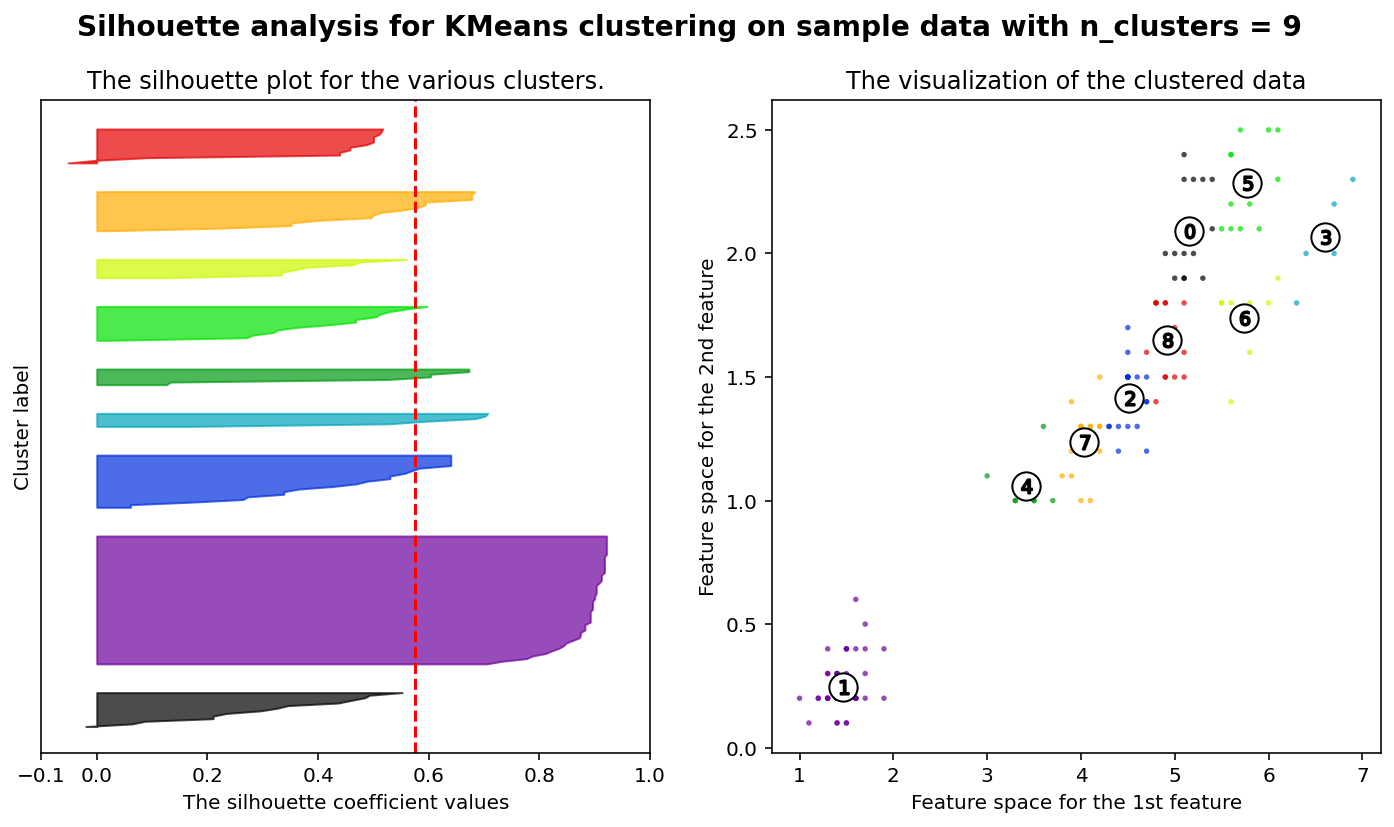

For n_clusters =  10 The average silhouette_score is :  0.43421900489031967


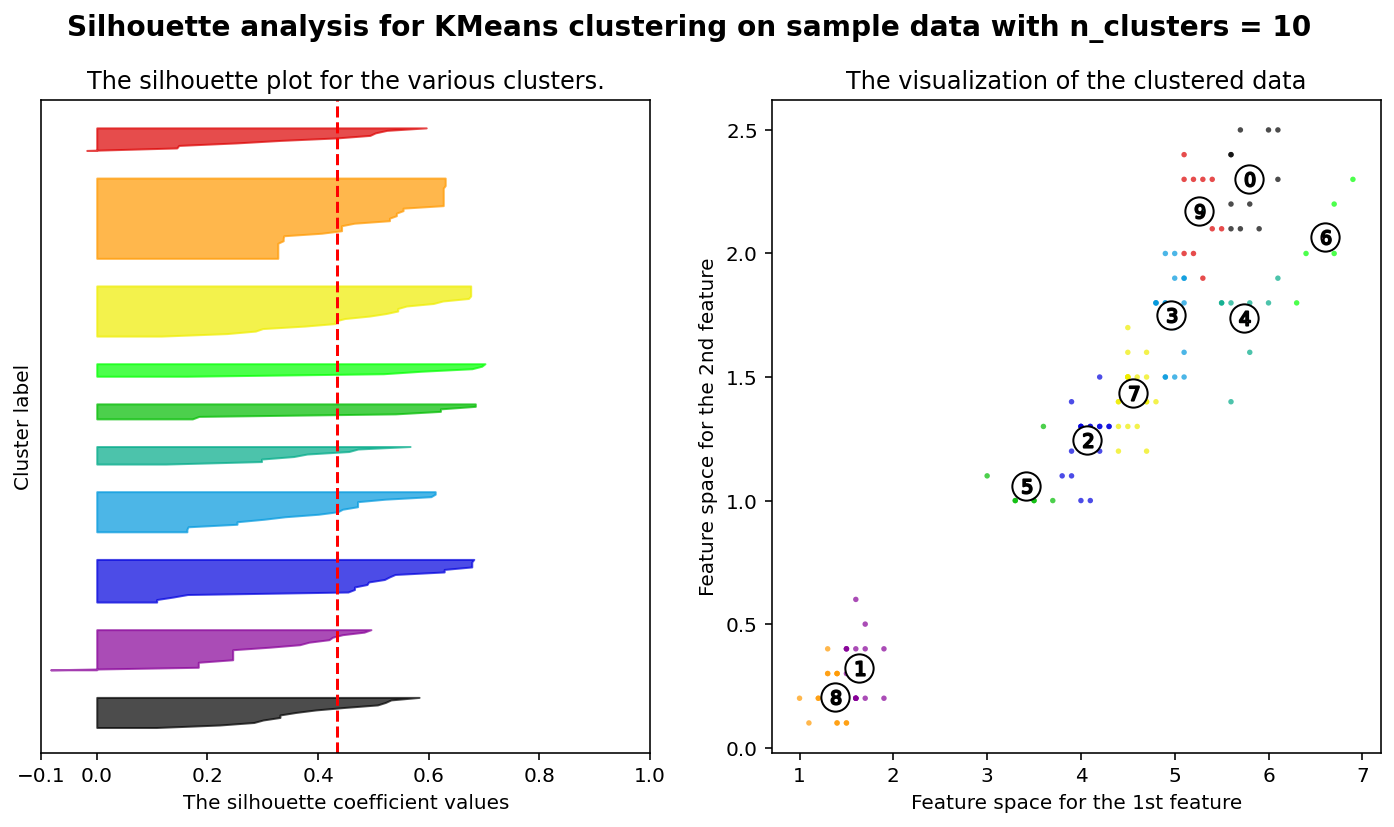

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
iris = sns.load_dataset('iris')
iris_X = iris.loc[:, ["petal_length", "petal_width"]]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_cluster = [i for i in range(2, 7)]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2) # 화면 분할
    fig.set_size_inches(12, 6) # 그래프 크기
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(iris_X) + (n_clusters + 1) * 10])
    # 군에 따른 누적 막대그래프를 그릴때 여백만큼 떨어지도록 하기 위해서 y limit를 키움
    
    # 클러스터의 수만큼 KMeans 모형을 만들고 클러스터를 예측함
    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(iris_X)
    
    # 모든 샘플에 대한 실루엣 스코어 평균값을 계산함
    silhouette_avg = silhouette_score(iris_X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          "The average silhouette_score is : ", silhouette_avg)
    
    # 각 샘플에 대하여 실루엣 스코어를 계산함
    sample_silhouette_values = silhouette_samples(iris_X, cluster_labels)
    
    y_lower = 10 # 그림을 밑에서 조금 띄우려고..
    # 반복문 1회마다 누적막대그래프를 그림
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        # 누적막대그래프의 공간을 채움(이 부분이 없으면 선만 그려짐)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # 모든 변수의 평균 실루엣 점수를 이용해 수직선을 추가
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 클러스터 된 산점도 그래프를 그림
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1],
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # 클러스터 라벨링
    centers = model.cluster_centers_
    # 클러스터 중앙에 테두리가 검정인 하얀 원을 그림
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()